In [10]:
from ultralytics import YOLO

from ultralytics.utils.checks import check_imshow
from ultralytics.utils.plotting import Annotator, colors

from collections import defaultdict

import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import pytesseract

In [2]:
track_history = defaultdict(lambda: [])
model = YOLO("yolov8n.pt")
names = model.model.names

In [3]:
for key, value in names.items():
    if 'book' in value:
        print(key, value)

73 book


In [4]:
img = cv2.imread('images/book_DL_3.jpg')

In [5]:
results = model.track(img, persist=True, verbose=False)

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [6]:
boxes = results[0].boxes.xyxy.cpu()

In [33]:
# results[0][]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [7]:
def normalize_color(color):
    return [element / 255 for element in color]

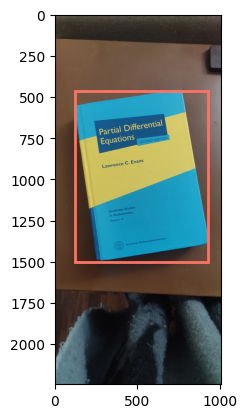

In [9]:
if results[0].boxes.id is not None:
    # Extract prediction results
    clss = results[0].boxes.cls.cpu().tolist()
    track_ids = results[0].boxes.id.int().cpu().tolist()
    confs = results[0].boxes.conf.float().cpu().tolist()

    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create a figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(img_rgb)

    for box, cls, track_id in zip(boxes, clss, track_ids):
        # Normalize color
        color = normalize_color(colors(int(cls), True))
        
        # Create a Rectangle patch
        rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=2, edgecolor=color, facecolor='none')


        # Add the patch to the Axes
        ax.add_patch(rect)

        # Store tracking history
        track = track_history[track_id]
        track.append((int((box[0] + box[2]) / 2), int((box[1] + box[3]) / 2)))
        if len(track) > 30:
            track.pop(0)

        # Plot tracks
        points = np.array(track, dtype=np.int32).reshape((-1, 1, 2))
        plt.plot(points[:, 0, 0], points[:, 0, 1], color=normalize_color(colors(int(cls), True)))

    plt.show()

In [34]:
confs

[0.6150858402252197]

In [13]:
# Extraer las cajas (box)
boxes = [box for box, cls, track_id in zip(boxes, clss, track_ids)]

# Extraer las cajas de la imagen (img)
img_boxes = []
for box in boxes:
    x1, y1, x2, y2 = map(int, box)
    img_box = img[y1:y2, x1:x2]
    img_boxes.append(img_box)

In [23]:
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(img, config=custom_config)
text

'oe NUEM :\nPartial ye \\ 4\nTe ES\n;\nag\nF By\n4 : e”.\n}\n'

In [26]:
print(pytesseract.image_to_data(img, config=custom_config))

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1010	2244	-1	
2	1	1	0	0	0	147	630	863	1599	-1	
3	1	1	1	0	0	147	630	863	1599	-1	
4	1	1	1	1	0	419	640	513	49	-1	
5	1	1	1	1	1	419	662	104	22	0.000000	oe
5	1	1	1	1	2	563	640	88	49	0.000000	NUEM
5	1	1	1	1	3	928	659	4	6	0.296867	:
4	1	1	1	2	0	265	630	416	112	-1	
5	1	1	1	2	1	265	673	140	69	96.534683	Partial
5	1	1	1	2	2	415	664	167	49	44.303375	ye
5	1	1	1	2	3	661	630	20	103	39.274136	\
5	1	1	1	2	4	936	706	11	13	75.305702	4
4	1	1	1	3	0	272	718	689	25	-1	
5	1	1	1	3	1	272	718	36	18	61.917984	Te
5	1	1	1	3	2	950	727	11	16	41.534313	ES
4	1	1	1	4	0	454	1085	3	1	-1	
5	1	1	1	4	1	454	1085	3	1	6.240608	;
4	1	1	1	5	0	805	1741	46	22	-1	
5	1	1	1	5	1	805	1741	46	22	59.542690	ag
4	1	1	1	6	0	149	1853	738	44	-1	
5	1	1	1	6	1	149	1883	12	14	26.732704	F
5	1	1	1	6	2	824	1853	35	23	24.214615	By
4	1	1	1	7	0	147	1896	757	37	-1	
5	1	1	1	7	1	147	1905	22	27	11.014336	4
5	1	1	1	7	2	468	1924	3	3	52.679405	:
5	1	1	1	7	3	860	18